In [2]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import RobustScaler
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import joblib
import os
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error


In [3]:
df=pd.read_csv('apy.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [5]:
x1=df['State_Name'].nunique()
x2=df['District_Name'].nunique()
x3=df['Season'].nunique()
x4=df['Crop'].nunique()

print(f"Unique States: {x1}")
print(f"Unique Districts: {x2}")
print(f"Unique Seasons: {x3}")
print(f"Unique Crops: {x4}")

Unique States: 33
Unique Districts: 646
Unique Seasons: 6
Unique Crops: 124


In [6]:
x=df['Area'].max()
y=df['Area'].min()
print("Max area is: ",x)
print("Min area is: ",y)

Max area is:  8580100.0
Min area is:  0.04


In [7]:
x=df['Production'].max()
y=df['Production'].min()
print("Max Production is: ",x)
print("Min Production is: ",y)

Max Production is:  1250800000.0
Min Production is:  0.0


In [8]:
df['Crop'].value_counts()

Crop
Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
                     ...  
Litchi                   6
Coffee                   6
Apple                    4
Peach                    4
Other Dry Fruit          1
Name: count, Length: 124, dtype: int64

In [9]:
df['Production'].isnull().sum()

3730

In [10]:
df['Area'].isnull().sum()

0

In [11]:
zeroprodrows = df[df["Production"] == 0]

print(zeroprodrows)

            State_Name       District_Name  Crop_Year       Season  \
397     Andhra Pradesh           ANANTAPUR       2002  Kharif        
424     Andhra Pradesh           ANANTAPUR       2002  Whole Year    
428     Andhra Pradesh           ANANTAPUR       2002  Whole Year    
430     Andhra Pradesh           ANANTAPUR       2002  Whole Year    
481     Andhra Pradesh           ANANTAPUR       2003  Whole Year    
...                ...                 ...        ...          ...   
221362   Uttar Pradesh            MAINPURI       2003  Rabi          
222672   Uttar Pradesh              MEERUT       2002  Kharif        
224493   Uttar Pradesh            PILIBHIT       2002  Kharif        
227377   Uttar Pradesh  SANT RAVIDAS NAGAR       2003  Rabi          
231266   Uttar Pradesh            VARANASI       2003  Kharif        

                     Crop    Area  Production  
397              Soyabean    51.0         0.0  
424              Cucumber    18.0         0.0  
428          ot

In [12]:
zeroprodcrops = df[df["Production"] == 0]["Crop"].value_counts()

print(zeroprodcrops.head(10))

Crop
Other Vegetables      286
Other Fresh Fruits    257
Pome Fruit            128
Citrus Fruit          121
Bhindi                119
Brinjal               119
Mango                 114
Cabbage               107
Cauliflower           104
Sesamum                97
Name: count, dtype: int64


C:\Users\ayush\AppData\Local\Temp\ipykernel_21772\3549624198.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zeroprodcropyears.index, y=zeroprodcropyears.values, palette="coolwarm")


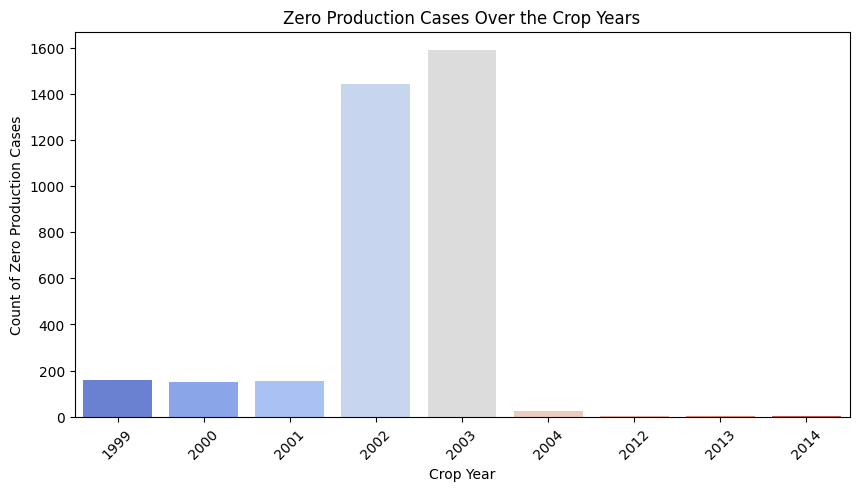

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

zeroprodcropyears = df[df["Production"] == 0]["Crop_Year"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=zeroprodcropyears.index, y=zeroprodcropyears.values, palette="coolwarm")
plt.xlabel("Crop Year")
plt.ylabel("Count of Zero Production Cases")
plt.title("Zero Production Cases Over the Crop Years")
plt.xticks(rotation=45)
plt.show()


In [14]:
maxrowarea = df.loc[df["Area"].idxmax()]
print(maxrowarea)

State_Name          West Bengal
District_Name             NADIA
Crop_Year                  1997
Season              Rabi       
Crop             Oilseeds total
Area                  8580100.0
Production            7556300.0
Name: 244878, dtype: object


In [15]:
maxrowprod = df.loc[df["Production"].idxmax()]
print(maxrowprod)

State_Name         Tamil Nadu
District_Name      COIMBATORE
Crop_Year                2011
Season            Whole Year 
Crop                 Coconut 
Area                  82704.0
Production       1250800000.0
Name: 178273, dtype: object


In [16]:
distperstate = df.groupby("State_Name")["District_Name"].nunique()
distperstate

State_Name
Andaman and Nicobar Islands     3
Andhra Pradesh                 13
Arunachal Pradesh              18
Assam                          27
Bihar                          38
Chandigarh                      1
Chhattisgarh                   27
Dadra and Nagar Haveli          1
Goa                             2
Gujarat                        26
Haryana                        21
Himachal Pradesh               12
Jammu and Kashmir              22
Jharkhand                      24
Karnataka                      30
Kerala                         14
Madhya Pradesh                 51
Maharashtra                    35
Manipur                         9
Meghalaya                      11
Mizoram                         8
Nagaland                       11
Odisha                         30
Puducherry                      4
Punjab                         22
Rajasthan                      33
Sikkim                          4
Tamil Nadu                     31
Telangana                      10
Tri

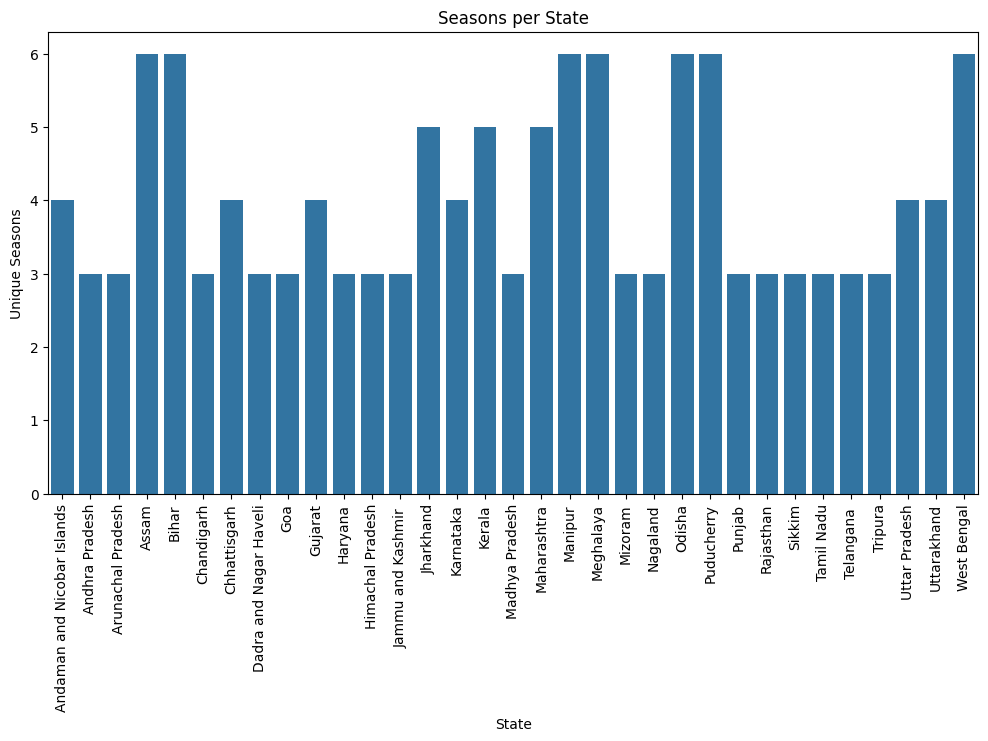

In [17]:


seasonperstate = df.groupby("State_Name")["Season"].nunique()

plt.figure(figsize=(12, 6))
sns.barplot(x=seasonperstate.index, y=seasonperstate.values, )
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Unique Seasons")
plt.title("Seasons per State")
plt.show()


C:\Users\ayush\AppData\Local\Temp\ipykernel_21772\943216108.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dfdisaster["Crop_Year"], y=dfdisaster["Production"], showfliers=True, palette="coolwarm")


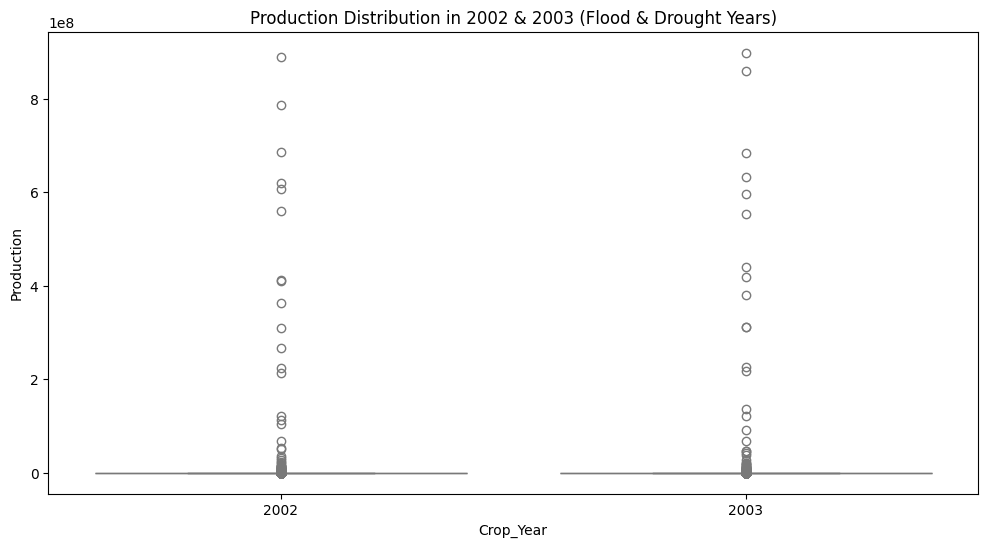

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

dfdisaster = df[df["Crop_Year"].isin([2002, 2003])]

plt.figure(figsize=(12, 6))
sns.boxplot(x=dfdisaster["Crop_Year"], y=dfdisaster["Production"], showfliers=True, palette="coolwarm")

plt.xlabel("Crop_Year")
plt.ylabel("Production")
plt.title("Production Distribution in 2002 & 2003 (Flood & Drought Years)")
plt.show()


In [19]:
dfdisaster = df[df["Crop_Year"].isin([2002, 2003])]

meanprod= dfdisaster.groupby("Crop_Year")["Production"].mean()
medianprod = dfdisaster.groupby("Crop_Year")["Production"].median()

print("Mean Production for 2002 & 2003:\n", meanprod)
print("\nMedian Production for 2002 & 2003:\n", medianprod)


Mean Production for 2002 & 2003:
 Crop_Year
2002    465466.567649
2003    461985.734566
Name: Production, dtype: float64

Median Production for 2002 & 2003:
 Crop_Year
2002    490.5
2003    565.0
Name: Production, dtype: float64


In [20]:
dfnormal = df[~df["Crop_Year"].isin([2002, 2003])]

meannormalprod = dfnormal.groupby("Crop_Year")["Production"].mean()
mediannormalprod = dfnormal.groupby("Crop_Year")["Production"].median()

print("Mean Production for Other Crop_Years:\n", meannormalprod)
print("\nMedian Production for Other Crop_Years:\n", mediannormalprod)


Mean Production for Other Crop_Years:
 Crop_Year
1997    9.565489e+04
1998    5.172545e+05
1999    5.172145e+05
2000    5.496723e+05
2001    5.616144e+05
2004    5.909555e+05
2005    5.949965e+05
2006    6.212016e+05
2007    4.821251e+05
2008    5.423063e+05
2009    5.564389e+05
2010    4.573050e+05
2011    1.037554e+06
2012    6.197705e+05
2013    9.575947e+05
2014    8.011596e+05
2015    1.236197e+04
Name: Production, dtype: float64

Median Production for Other Crop_Years:
 Crop_Year
1997    1637.0
1998    1115.0
1999    1013.0
2000     768.0
2001     777.0
2004     738.5
2005     733.0
2006     745.0
2007     620.0
2008     701.0
2009     698.0
2010     780.0
2011     757.0
2012     683.5
2013     681.0
2014     673.0
2015     227.3
Name: Production, dtype: float64


In [21]:
zerocounts = df[df["Production"] == 0].groupby("Crop_Year")["Production"].count()
print(zerocounts)


Crop_Year
1999     159
2000     152
2001     154
2002    1442
2003    1589
2004      24
2012       1
2013       1
2014       1
Name: Production, dtype: int64


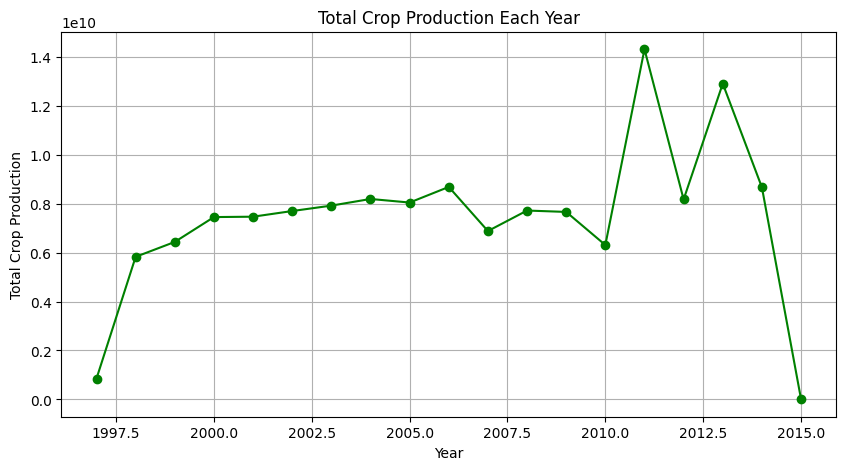

In [22]:

totalprod = df.groupby("Crop_Year")["Production"].sum()

plt.figure(figsize=(10,5))
plt.plot(totalprod.index, totalprod.values, marker="o", linestyle="-", color="g")
plt.xlabel("Year")
plt.ylabel("Total Crop Production")
plt.title("Total Crop Production Each Year")
plt.grid(True)
plt.show()


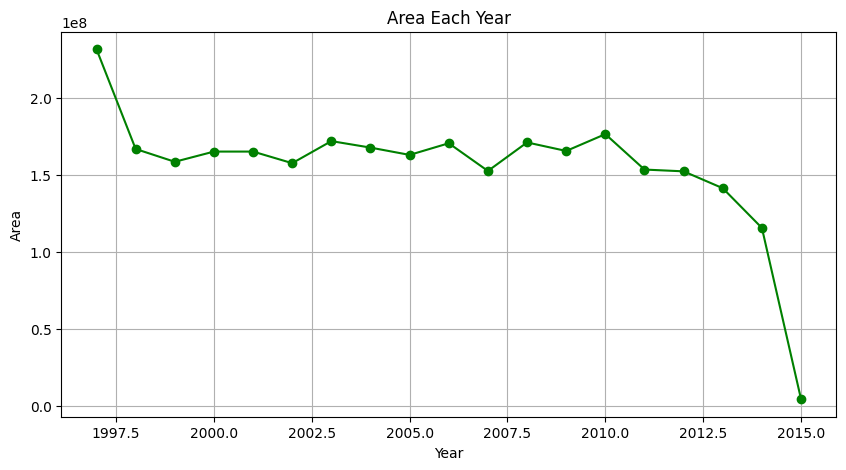

In [23]:
totalarea = df.groupby("Crop_Year")["Area"].sum()

plt.figure(figsize=(10,5))
plt.plot(totalarea.index, totalarea.values, marker="o", linestyle="-", color="g")
plt.xlabel("Year")
plt.ylabel("Area")
plt.title("Area Each Year")
plt.grid(True)
plt.show()

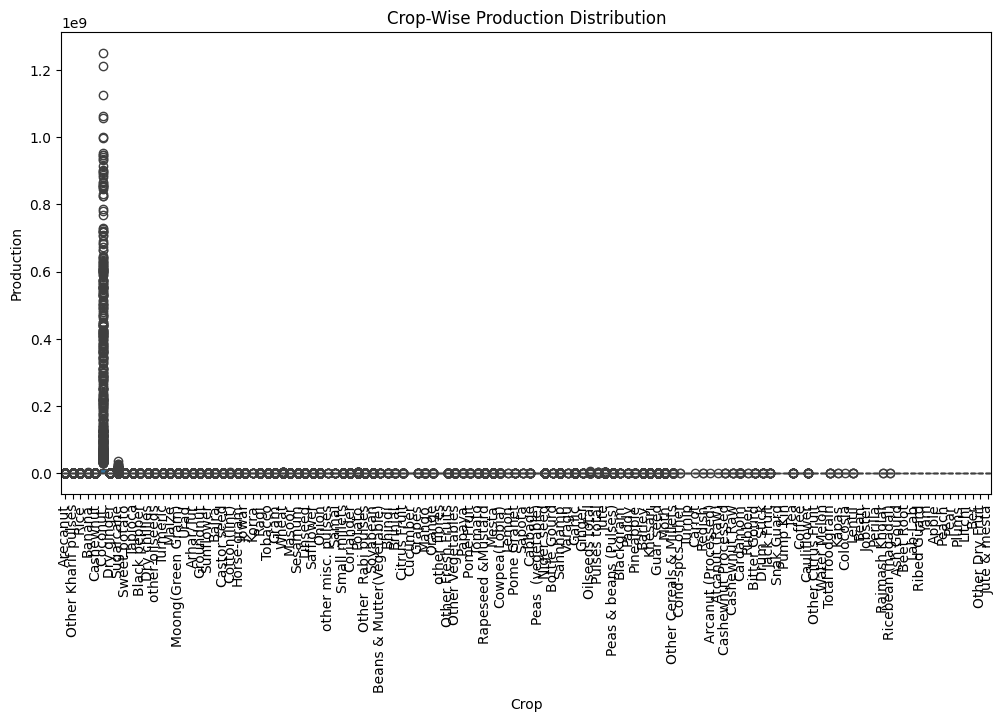

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Crop", y="Production", data=df)
plt.xticks(rotation=90)
plt.xlabel("Crop")
plt.ylabel("Production")
plt.title("Crop-Wise Production Distribution")
plt.show()


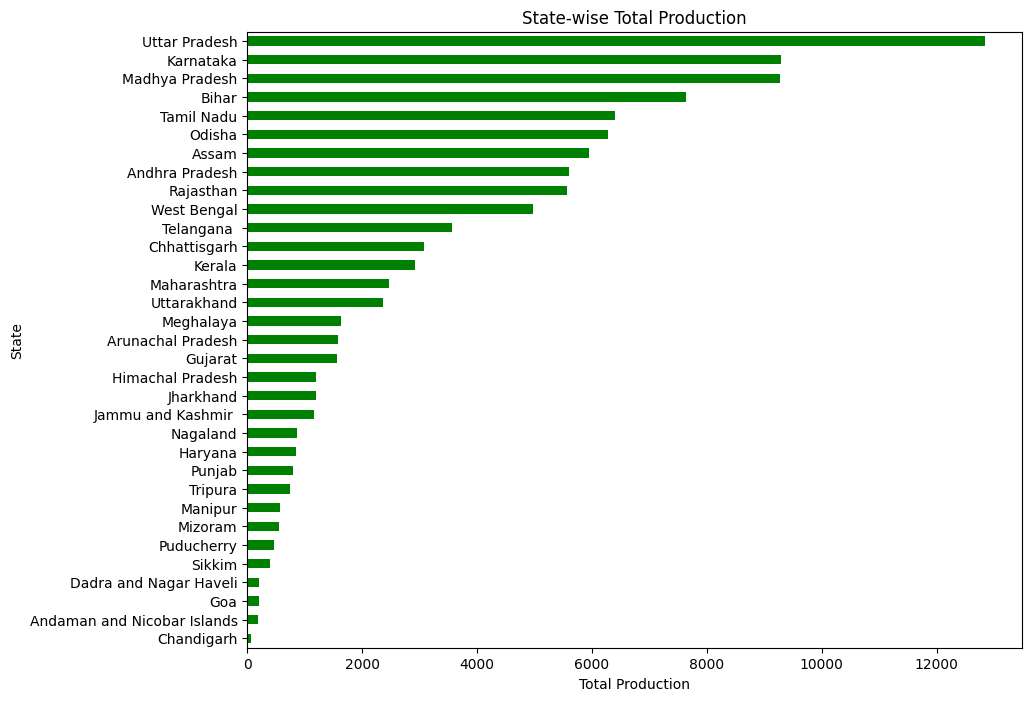

In [25]:
statewiseprod = df.groupby("State_Name")["Production"].nunique().sort_values()

plt.figure(figsize=(10, 8))
statewiseprod.plot(kind="barh", color="green")
plt.xlabel("Total Production")
plt.ylabel("State")
plt.title("State-wise Total Production")
plt.show()


In [26]:
df["Yield"] = df["Production"] / df["Area"]

In [27]:
df["LogYield"] = np.log1p(df["Yield"]) 

In [28]:
print(df.isnull().sum())

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
Yield            3730
LogYield         3730
dtype: int64


In [29]:
df = df.dropna()


In [30]:
df.shape

(242361, 9)

In [31]:
# Count zero production values by year
zerocount = df[df["Production"] == 0].groupby("Crop_Year")["Production"].count()
print(zerocount)


Crop_Year
1999     159
2000     152
2001     154
2002    1442
2003    1589
2004      24
2012       1
2013       1
2014       1
Name: Production, dtype: int64


Crop_Year
1997     8899
1998    11262
1999    12441
2000    13553
2001    13293
2002    16536
2003    17139
2004    13858
2005    13519
2006    13976
2007    14269
2008    14230
2009    13767
2010    13793
2011    13791
2012    13184
2013    13475
2014    10815
2015      561
Name: count, dtype: int64


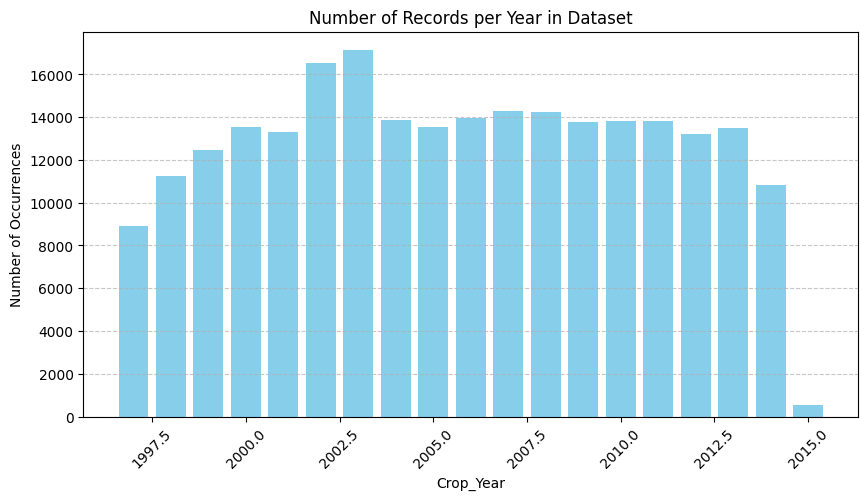

In [32]:
cropperyear = df["Crop_Year"].value_counts().sort_index()

print(cropperyear)

plt.figure(figsize=(10, 5))
plt.bar(cropperyear.index, cropperyear.values, color="skyblue")
plt.xlabel("Crop_Year")
plt.ylabel("Number of Occurrences")
plt.title("Number of Records per Year in Dataset")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [33]:
print(df[["Yield", "LogYield"]].describe())

print(df[["Yield", "LogYield"]].isnull().sum())
print(df[["Yield", "LogYield"]].replace([np.inf, -np.inf], np.nan).isnull().sum())


               Yield       LogYield
count  242361.000000  242361.000000
mean       41.649059       1.030678
std       817.572839       1.035386
min         0.000000       0.000000
25%         0.513514       0.414434
50%         1.000000       0.693147
75%         2.355450       1.210586
max     88000.000000      11.385103
Yield       0
LogYield    0
dtype: int64
Yield       0
LogYield    0
dtype: int64


In [34]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield,LogYield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896,0.953547
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000,0.405465
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059,1.422399
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045,1.535155
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167,0.206336
...,...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0,2.617647,1.285824
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0,0.738437,0.552986
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0,50.154321,3.934847
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0,2.141848,1.144811


In [35]:
State_Name_encoder = LabelEncoder()
df["State_Name"] = State_Name_encoder.fit_transform(df["State_Name"])

In [36]:
Crop_encoder = LabelEncoder()
df["Crop"] = Crop_encoder.fit_transform(df["Crop"])

In [37]:
season_dummies = pd.get_dummies(df['Season'], prefix='', prefix_sep='')
df = pd.concat([df, season_dummies], axis=1)
df.drop(columns=['Season'], inplace=True)


In [38]:
scaler = StandardScaler()
df[['scaled_LogYield']] = scaler.fit_transform(df[['LogYield']])


In [39]:
X_scaled = df[['scaled_LogYield'] + list(season_dummies.columns)]


In [40]:
df

,State_Name,District_Name,Crop_Year,Crop,Area,Production,Yield,LogYield,Autumn,Kharif,Rabi,Summer,Whole Year,Winter,scaled_LogYield
0,0,NICOBARS,2000,2,1254.0,2000.0,1.594896,0.953547,False,True,False,False,False,False,-0.074496
1,0,NICOBARS,2000,74,2.0,1.0,0.500000,0.405465,False,True,False,False,False,False,-0.603847
2,0,NICOBARS,2000,95,102.0,321.0,3.147059,1.422399,False,True,False,False,False,False,0.378334
3,0,NICOBARS,2000,7,176.0,641.0,3.642045,1.535155,False,False,False,False,True,False,0.487236
4,0,NICOBARS,2000,22,720.0,165.0,0.229167,0.206336,False,False,False,False,True,False,-0.796170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,32,PURULIA,2014,95,306.0,801.0,2.617647,1.285824,False,False,False,True,False,False,0.246426
246087,32,PURULIA,2014,102,627.0,463.0,0.738437,0.552986,False,False,False,True,False,False,-0.461367
246088,32,PURULIA,2014,106,324.0,16250.0,50.154321,3.934847,False,False,False,False,True,False,2.804919
246089,32,PURULIA,2014,95,279151.0,597899.0,2.141848,1.144811,False,False,False,False,False,True,0.110232


In [41]:
# 

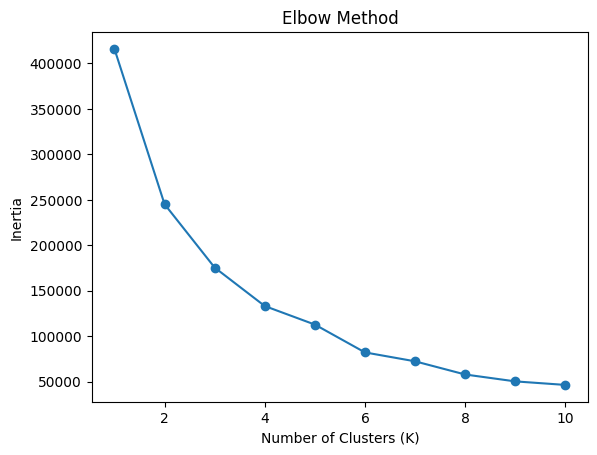

In [42]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [43]:
list(season_dummies.columns)

['Autumn     ',
 'Kharif     ',
 'Rabi       ',
 'Summer     ',
 'Whole Year ',
 'Winter     ']

Cluster Characteristics:
         avg_yield  median_area
cluster                        
0         0.796910        800.0
1         2.964771        360.0
2         0.770254        167.0
3         0.712312        898.0
4         0.634488        960.0
5         8.877735       1386.0


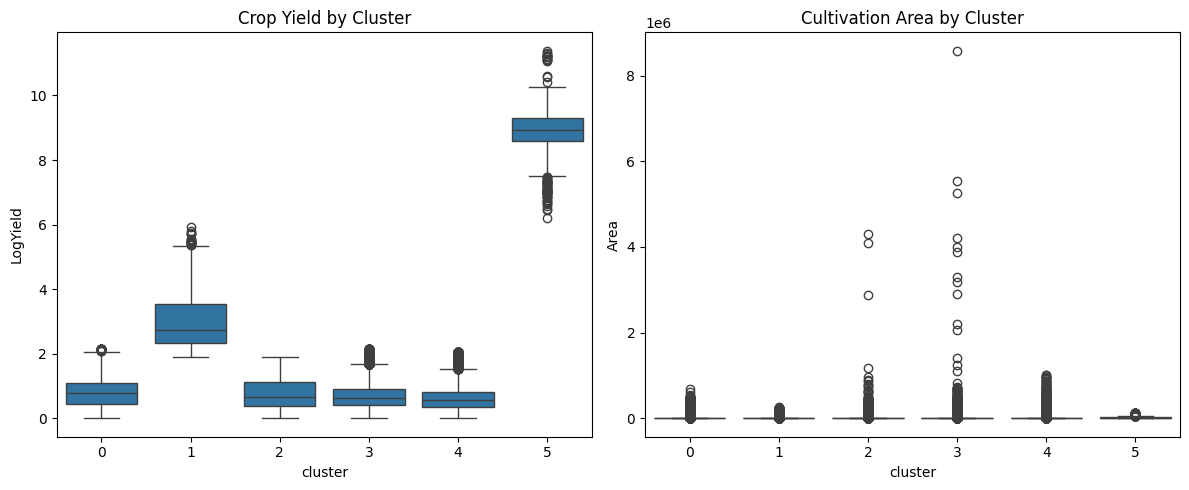

In [44]:

scaler = StandardScaler()
df[['scaled_LogYield']] = scaler.fit_transform(df[['LogYield']])

kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df[['scaled_LogYield'] + list(season_dummies.columns)])

cluster_stats = df.groupby('cluster').agg(
    avg_yield=('LogYield', 'mean'),
    median_area=('Area', 'median')
)

print("Cluster Characteristics:")
print(cluster_stats)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='cluster', y='LogYield')
plt.title('Crop Yield by Cluster')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='cluster', y='Area')
plt.title('Cultivation Area by Cluster')

plt.tight_layout()
plt.show()

In [45]:
# Save the KMeans model in your notebook
joblib.dump(kmeans, 'cluster_models/kmeans_model.joblib')

# Also save the StandardScaler used for LogYield
joblib.dump(scaler, 'cluster_models/logyield_scaler.joblib')

['cluster_models/logyield_scaler.joblib']

In [46]:
df.to_csv("clustered_data3.csv", index=False)

In [47]:

os.makedirs('cluster_models', exist_ok=True)

features = ['Area'] + list(season_dummies.columns) + ['State_Name']+['Crop']
target = 'Production'  

cluster_model_info = {}

for cluster in sorted(df['cluster'].unique()):
    print(f"\n=== Training Random Forest for Cluster {cluster} ===")
    

    cluster_data = df[df['cluster'] == cluster]

    X = cluster_data[features]
    y = cluster_data[target]
    

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = RandomForestRegressor(
        n_estimators=150, 
        max_depth=8,
        min_samples_split=5,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train_scaled, y_train)
    
  
    y_pred = model.predict(X_test_scaled)
    Mae = np.sqrt(mean_absolute_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mae: {Mae:.2f}")
    print(f"R² Score: {r2:.2f}")
    

    model_data = {
        'model': model,
        'scaler': scaler,
        'features': features,
        'Mae': Mae,
        'r2': r2,
        'n_samples': len(X_train)
    }
    
    model_path = f'cluster_models/rf_cluster_{cluster}.joblib'
    joblib.dump(model_data, model_path)

    cluster_model_info[cluster] = {
        'path': model_path,
        'Mae': Mae,
        'r2': r2,
        'n_samples': len(X_train)
    }

joblib.dump(cluster_model_info, 'cluster_models/metadata.joblib')

print("\n=== Model Training Complete ===")


=== Training Random Forest for Cluster 0 ===
Mae: 80.45
R² Score: 0.92

=== Training Random Forest for Cluster 1 ===
Mae: 182.99
R² Score: 0.97

=== Training Random Forest for Cluster 2 ===
Mae: 50.03
R² Score: 0.86

=== Training Random Forest for Cluster 3 ===
Mae: 79.53
R² Score: 0.95

=== Training Random Forest for Cluster 4 ===
Mae: 85.74
R² Score: 0.87

=== Training Random Forest for Cluster 5 ===
Mae: 5490.34
R² Score: 0.93

=== Model Training Complete ===


In [48]:
season_columns = list(season_dummies.columns)

def top_two_seasons(cluster_df):
    season_counts = cluster_df[season_columns].sum().sort_values(ascending=False)
    top_season = season_counts.index[0]
    second_season = season_counts.index[1] if len(season_counts) > 1 else None
    return top_season, second_season

dominant_seasons = df.groupby('cluster').apply(top_two_seasons)

season_df = pd.DataFrame(dominant_seasons.tolist(), 
                         index=dominant_seasons.index, 
                         columns=['Dominant_Season', 'Second_Dominant_Season'])

season_names = season_df.to_dict(orient='index')

for cluster, seasons in season_names.items():
    print(f"Cluster {cluster}: Dominant = {seasons['Dominant_Season']}, Second Dominant = {seasons['Second_Dominant_Season']}")


Cluster 0: Dominant = Summer     , Second Dominant = Winter     
Cluster 1: Dominant = Whole Year , Second Dominant = Kharif     
Cluster 2: Dominant = Whole Year , Second Dominant = Autumn     
Cluster 3: Dominant = Rabi       , Second Dominant = Autumn     
Cluster 4: Dominant = Kharif     , Second Dominant = Autumn     
Cluster 5: Dominant = Whole Year , Second Dominant = Autumn     


C:\Users\ayush\AppData\Local\Temp\ipykernel_21772\2983618422.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dominant_seasons = df.groupby('cluster').apply(top_two_seasons)


Loading model for Cluster 0...
Loading model for Cluster 1...
Loading model for Cluster 2...
Loading model for Cluster 3...
Loading model for Cluster 4...
Loading model for Cluster 5...


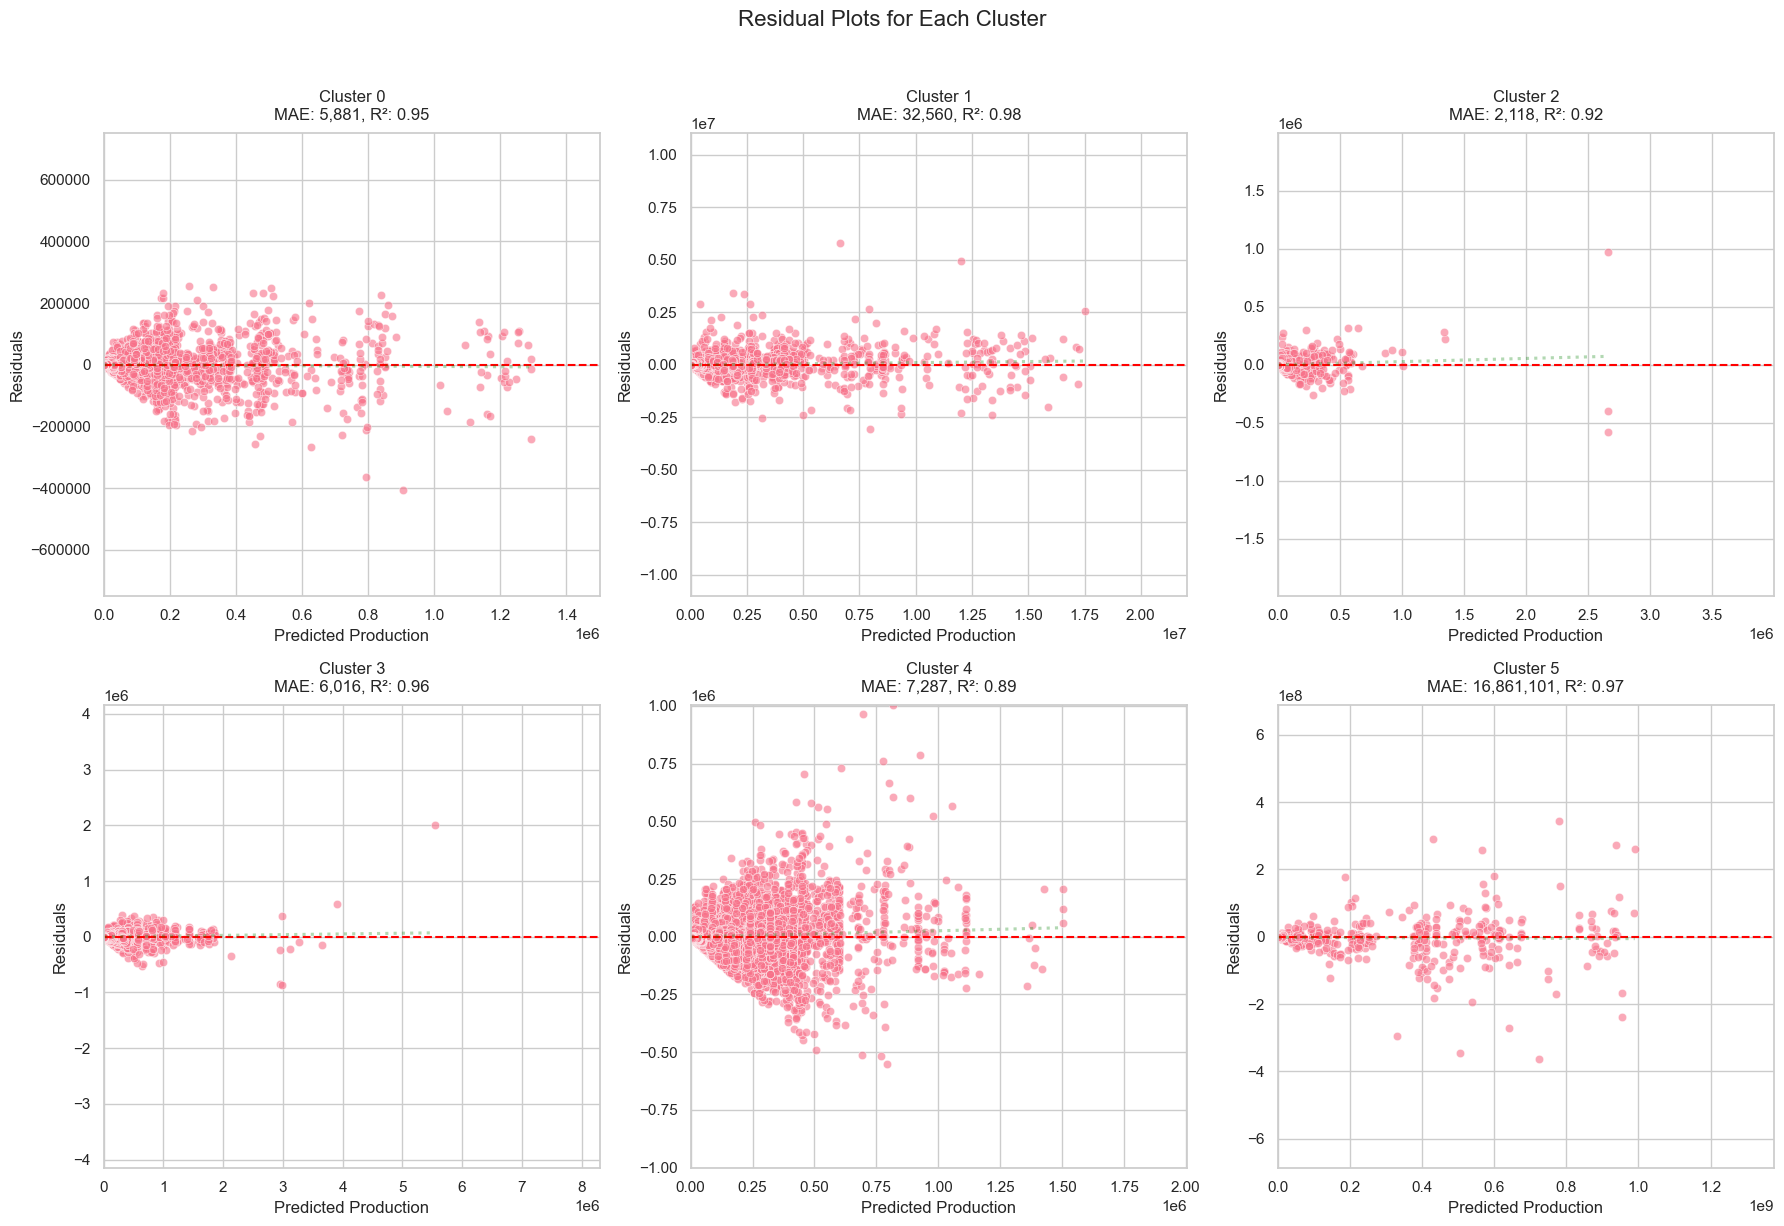


=== Model Performance Summary ===
   Cluster          MAE         RMSE    R²  Avg_Residual  Residual_Std
0        0      5881.46     19199.70  0.95       -223.48      19198.81
1        1     32560.15    139010.20  0.98        760.78     139010.29
2        2      2117.93     11759.67  0.92         -2.80      11759.84
3        3      6016.44     23332.31  0.96        -54.68      23332.43
4        4      7286.73     27880.29  0.89         -2.60      27880.44
5        5  16861100.58  43037780.45  0.97   -2170451.15   43004896.15

=== Feature Importance ===

Cluster 0:
    Feature  Importance
       Area    0.913863
 State_Name    0.049045
Summer         0.021712
Winter         0.011708
       Crop    0.003114
Autumn         0.000558
Kharif         0.000000
Rabi           0.000000
Whole Year     0.000000

Cluster 1:
    Feature  Importance
       Area    0.871437
       Crop    0.101511
 State_Name    0.026310
Kharif         0.000277
Rabi           0.000232
Whole Year     0.000205
Winter  

In [49]:
metadata_path = 'cluster_models/metadata.joblib'
metadata = joblib.load(metadata_path)

n_clusters = len(metadata)
n_rows = (n_clusters + 2) // 3

plt.style.use('ggplot')
sns.set_theme(style="whitegrid", palette="husl")
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6 * n_rows))
fig.suptitle('Residual Plots for Each Cluster', y=1.02, fontsize=16)

axes = axes.flatten() if n_rows > 1 else [axes]

performance_data = []

for idx, (cluster, model_info) in enumerate(metadata.items()):
    print(f"Loading model for Cluster {cluster}...")

    model_data = joblib.load(model_info['path'])
    model = model_data['model']
    scaler = model_data['scaler']
    features = model_data['features']
    
    cluster_df = df[df['cluster'] == int(cluster)]
    X = cluster_df[features]
    y = cluster_df['Production']

    X_scaled = scaler.transform(X)

    y_pred = model.predict(X_scaled)
    residuals = y - y_pred

    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2 = r2_score(y, y_pred)

    performance_data.append({
        'Cluster': cluster,
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2,
        'Avg_Residual': residuals.mean(),
        'Residual_Std': residuals.std()
    })

    ax = axes[idx]
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, ax=ax)
    ax.axhline(0, color='red', linestyle='--')

    if len(y_pred) > 1:
        sns.regplot(x=y_pred, y=residuals, 
                    scatter=False, 
                    ci=None,
                    line_kws={'color': 'green', 'alpha': 0.3, 'linestyle': ':'},
                    ax=ax)

    ax.set_title(f'Cluster {cluster}\nMAE: {mae:,.0f}, R²: {r2:.2f}', pad=10)
    ax.set_xlabel('Predicted Production')
    ax.set_ylabel('Residuals')

    max_prod = max(y.max(), y_pred.max()) * 1.1
    ax.set_xlim(0, max_prod)
    ax.set_ylim(-max_prod / 2, max_prod / 2)

for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

performance_df = pd.DataFrame(performance_data)
print("\n=== Model Performance Summary ===")
print(performance_df.round(2))

print("\n=== Feature Importance ===")
for cluster, model_info in metadata.items():
    model_data = joblib.load(model_info['path'])
    model = model_data['model']

    importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print(f"\nCluster {cluster}:")
    print(importance_df.to_string(index=False))